# Comparison of Regressors for Real Estate Valuation

In this assignment we have been given the task to create a Decision Tree Regressor and a Linear Regression Model , and compare the performance of the two, from the given dataset. Our main objective is to figure out what is the best algorithm for this dataset.

## *The dataset*



#### *What is the purpose of this dataset?*
The purpose of this dataset is find the price of the real estate using regression.

#### *What are the features?*
The features or our input data is:

- When the house was bought 
- How old the house is  
- How far from the nearest MRT station
- The amount of convenience stores
- Latitude
- Longitude
- House price of unit area


In essence, we are dealing with continous values. 

#### *What are the targets?*
Our target will be the actual price that our model is trying to learn how to predict.


In [1002]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [1003]:
dataset = pd.read_csv('realestate.csv', sep=",")
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.drop('No', axis=1, inplace=True)
dataset.head(15)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


### Removed unnecessary coloumns

In [1004]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [1005]:
features = dataset.drop('Y house price of unit area', axis=1)
targets = dataset['Y house price of unit area']

train_features, test_features, train_targets, test_targets = train_test_split(features,targets,test_size=0.2)

In [1006]:
decision_tree_Regressor_model1 = DecisionTreeRegressor()
decision_tree_Regressor_model1.fit(train_features,train_targets)

DecisionTreeRegressor()

In [1007]:
decision_tree_Regressor_model2 = DecisionTreeRegressor(min_samples_split=20)
decision_tree_Regressor_model2.fit(train_features,train_targets)

DecisionTreeRegressor(min_samples_split=20)

In [1008]:
def evaluate(model):
    
    predictions_train = model.predict(train_features)
    predictions_test = model.predict(test_features)

    print(f"R2: {r2_score(train_targets, predictions_train)}")
    print(f"MSE: {mean_squared_error(train_targets, predictions_train)}")
    print(f"MAE: {mean_absolute_error(train_targets, predictions_train)}")
    
    print()

    print(f"R2: {r2_score(test_targets, predictions_test)}")
    print(f"MSE: {mean_squared_error(test_targets, predictions_test)}")
    print(f"MAE: {mean_absolute_error(test_targets, predictions_test)}")

In [1009]:
linear_Regression_model1 = LinearRegression()
linear_Regression_model1.fit(train_features, train_targets) 

LinearRegression()

In [1010]:
print("DECISION TREE REGRESSOR:\n ")
evaluate(decision_tree_Regressor_model1)
print()
print("DECISION TREE REGRESSOR 2:\n ")
evaluate(decision_tree_Regressor_model2)
print()
print("LINEAR REGRESSION MODEL:\n")
evaluate(linear_Regression_model1)

DECISION TREE REGRESSOR:
 
R2: 0.9963292443919846
MSE: 0.7108157099697886
MAE: 0.19456193353474321

R2: 0.49594971588114534
MSE: 74.72289156626506
MAE: 6.286746987951808

DECISION TREE REGRESSOR 2:
 
R2: 0.8068004994310108
MSE: 37.411708876200365
MAE: 3.920505023768074

R2: 0.6672336245450738
MSE: 49.33092307146539
MAE: 5.52685579539761

LINEAR REGRESSION MODEL:

R2: 0.5834036708005093
MSE: 80.67091550963747
MAE: 6.121730257436667

R2: 0.5692870462521777
MSE: 63.85100525306969
MAE: 6.377494084102444


# * OPTIONAL SEGMENT ONLY FOR VISUALIZATION *

# FOLLOWING CODE WAS NOT WRITTEN BY ME, IT IS A WORK OF A CLAUDE.AI

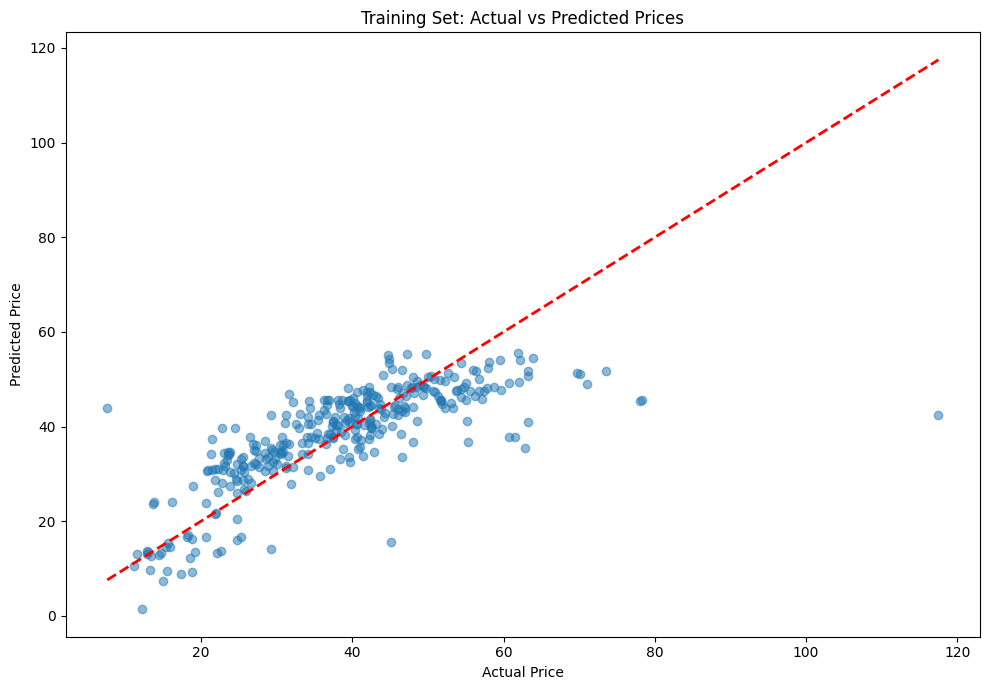

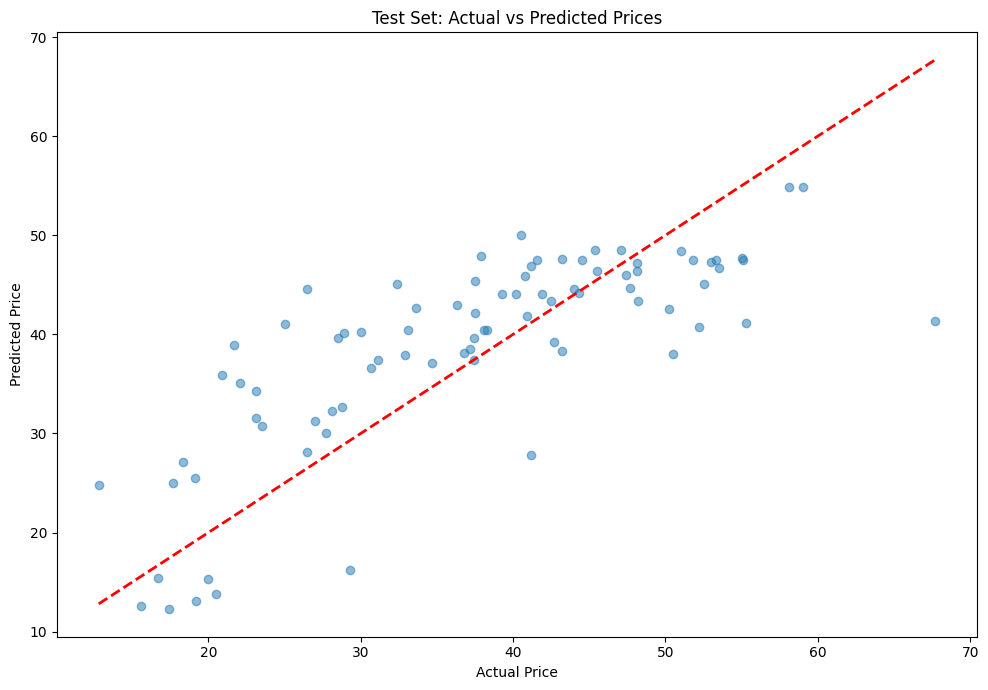

In [1011]:

def plot_actual_vs_predicted(actual, predicted, set_name):
    plt.figure(figsize=(10, 7))
    plt.scatter(actual, predicted, alpha=0.5)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{set_name} Set: Actual vs Predicted Prices")
    plt.tight_layout()
    plt.show()

train_predictions = linear_Regression_model1.predict(train_features)
test_predictions = linear_Regression_model1.predict(test_features)

plot_actual_vs_predicted(train_targets, train_predictions, "Training")
plot_actual_vs_predicted(test_targets, test_predictions, "Test")
